# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs, cities, temperature, humidity, cloudiness, and wind speed
lat_lngs = []
lat = []
lon = []
country = []
date = []
cities = []
cities_clean = []
temp_max = []
humidity = []
cloudiness = []
wind_speed = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Save config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [11]:
# Get weather data using for loop, and counters for individual cities and API pulls; the API tops out at 60 rows per minute
# for the free API, which necessitates the time.sleep(63) so the API doesn't get blocked for overuse. 
counter = 0
set_counter = 1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cities_clean.append(response['name'])
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        counter += 1
        if counter % 50 == 0: 
            set_counter = set_counter + 1
            time.sleep(63)
        else:
            set_counter = set_counter
        
# Process printing
        print(f"Processing Record {counter} of Set {set_counter} | {city}")
    except KeyError:
        print("City not found. Skipping...")

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | daru
Processing Record 3 of Set 1 | nanortalik
Processing Record 4 of Set 1 | russkiy kameshkir
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | aklavik
Processing Record 8 of Set 1 | rocha
Processing Record 9 of Set 1 | la ronge
Processing Record 10 of Set 1 | goderich
Processing Record 11 of Set 1 | brewster
Processing Record 12 of Set 1 | yining
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | sarangani
City not found. Skipping...
Processing Record 15 of Set 1 | batagay
City not found. Skipping...
Processing Record 16 of Set 1 | conde
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | oranjemund
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 | manzhouli
Processing Record 22 of Set 1 | henties bay
Processing Record 23 of Set 1 | upernavik
Proc

Processing Record 185 of Set 4 | luwuk
Processing Record 186 of Set 4 | norman wells
Processing Record 187 of Set 4 | pindiga
Processing Record 188 of Set 4 | cabinda
Processing Record 189 of Set 4 | avarua
Processing Record 190 of Set 4 | cherskiy
Processing Record 191 of Set 4 | longview
Processing Record 192 of Set 4 | geraldton
Processing Record 193 of Set 4 | kloulklubed
Processing Record 194 of Set 4 | fontem
Processing Record 195 of Set 4 | umred
Processing Record 196 of Set 4 | ilulissat
Processing Record 197 of Set 4 | port hedland
Processing Record 198 of Set 4 | qaanaaq
Processing Record 199 of Set 4 | clifton
Processing Record 200 of Set 5 | shagonar
Processing Record 201 of Set 5 | kaitangata
Processing Record 202 of Set 5 | etchojoa
Processing Record 203 of Set 5 | arraial do cabo
City not found. Skipping...
Processing Record 204 of Set 5 | khatanga
Processing Record 205 of Set 5 | turinskaya sloboda
City not found. Skipping...
Processing Record 206 of Set 5 | finnsnes
Pr

City not found. Skipping...
City not found. Skipping...
Processing Record 368 of Set 8 | tiksi
Processing Record 369 of Set 8 | victoria
Processing Record 370 of Set 8 | hami
Processing Record 371 of Set 8 | zaysan
Processing Record 372 of Set 8 | burns lake
Processing Record 373 of Set 8 | lethem
Processing Record 374 of Set 8 | codrington
Processing Record 375 of Set 8 | shache
Processing Record 376 of Set 8 | mufumbwe
City not found. Skipping...
Processing Record 377 of Set 8 | susehri
Processing Record 378 of Set 8 | havelock
Processing Record 379 of Set 8 | sistranda
Processing Record 380 of Set 8 | morant bay
Processing Record 381 of Set 8 | pilar
Processing Record 382 of Set 8 | coronado
Processing Record 383 of Set 8 | nikolskoye
City not found. Skipping...
Processing Record 384 of Set 8 | oudtshoorn
City not found. Skipping...
Processing Record 385 of Set 8 | haysville
Processing Record 386 of Set 8 | roebourne
Processing Record 387 of Set 8 | kurilsk
City not found. Skipping.

Processing Record 545 of Set 11 | ukiah
Processing Record 546 of Set 11 | muheza
Processing Record 547 of Set 11 | laje
Processing Record 548 of Set 11 | moose factory
Processing Record 549 of Set 11 | havoysund
Processing Record 550 of Set 12 | cam ranh
City not found. Skipping...
Processing Record 551 of Set 12 | teshie
Processing Record 552 of Set 12 | magadan
City not found. Skipping...
Processing Record 553 of Set 12 | jilib
Processing Record 554 of Set 12 | kirensk
Processing Record 555 of Set 12 | veraval
City not found. Skipping...
Processing Record 556 of Set 12 | ostrovnoy
City not found. Skipping...
Processing Record 557 of Set 12 | faya
Processing Record 558 of Set 12 | cuiluan
Processing Record 559 of Set 12 | feni
Processing Record 560 of Set 12 | grants
City not found. Skipping...
Processing Record 561 of Set 12 | ankang
Processing Record 562 of Set 12 | lucea
City not found. Skipping...
Processing Record 563 of Set 12 | lauro muller
City not found. Skipping...
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Prepare and create Weather API output dataframe (the cities_ready portion below selects out the cities that were not found
# during the API request, so they don't produce an error during the dataframe creation process)
cities_ready = [city for city in cities_clean if city not in cities]
cities_ready

weather_dict = {
    "City": cities_ready,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date, 
    "Humidity": humidity,
    "Lat": lat,
    "Lon": lon,
    "Max Temp (F)": temp_max,
    "Wind speed": wind_speed
    }   
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp (F),Wind speed
0,Kapaa,40,US,1541296560,62,22.08,-159.32,82.04,20.80
1,Daru,64,SL,1541299384,91,7.99,-10.85,74.16,2.08
2,Nanortalik,0,GL,1541299385,97,60.14,-45.24,30.28,28.59
3,Russkiy Kameshkir,92,RU,1541299385,75,52.86,46.09,36.31,12.03
4,Airai,8,TL,1541299385,50,-8.93,125.41,86.49,1.03
5,Fortuna,0,ES,1541298600,81,38.18,-1.13,51.80,6.93
6,Aklavik,40,CA,1541296800,84,68.22,-135.01,-0.41,3.36
7,Rocha,0,UY,1541299386,94,-34.48,-54.34,51.66,3.27
8,La Ronge,90,CA,1541296800,89,55.10,-105.30,32.00,9.17
9,Goderich,36,CA,1541299299,85,43.74,-81.71,41.08,10.25


In [13]:
# Export weather data to csv
weather_data.to_csv("weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

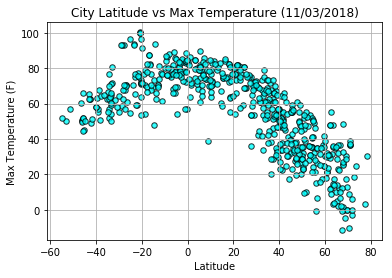

In [14]:
# Prepare variables for scatterplots, including sorting values, scaling the area by exponent 1.55, and setting company colors
x_latitude = lat
y_temp = temp_max
c = ["aqua"]

# Plot the type scatters, which show up on one plot
plt.scatter(x=x_latitude, y=y_temp, s=30, c=c, marker='o', cmap=None, norm=None,
                          vmin=None, vmax=None, alpha=0.8, linewidths=1, verts=None,
                          edgecolors="black", data=None)

#Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (11/03/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Create a legend and grid
plt.grid(True)

# Save Figure
plt.savefig("City Latitude vs Max Temperature (11-03-2018).png")

#### Latitude vs. Humidity Plot

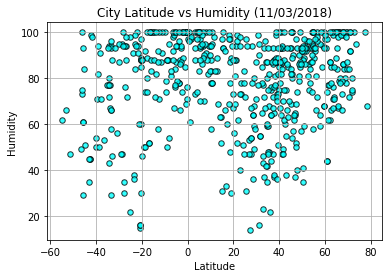

In [15]:
# Prepare variables for scatterplots, including sorting values, scaling the area by exponent 1.55, and setting company colors
x_latitude = lat
y_temp = humidity
c = ["aqua"]

# Plot the type scatters, which show up on one plot
plt.scatter(x=x_latitude, y=y_temp, s=30, c=c, marker='o', cmap=None, norm=None,
                          vmin=None, vmax=None, alpha=0.8, linewidths=1, verts=None,
                          edgecolors="black", data=None)

#Incorporate the other graph properties
plt.title("City Latitude vs Humidity (11/03/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Create a legend and grid
plt.grid(True)

# Save Figure
plt.savefig("City Latitude vs Humidity (11-03-2018).png")

#### Latitude vs. Cloudiness Plot

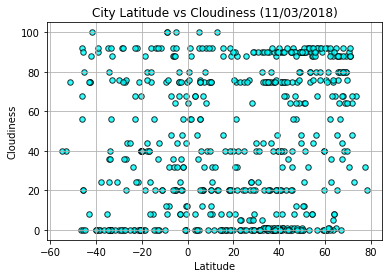

In [16]:
# Prepare variables for scatterplots, including sorting values, scaling the area by exponent 1.55, and setting company colors
x_latitude = lat
y_temp = cloudiness
c = ["aqua"]

# Plot the type scatters, which show up on one plot
plt.scatter(x=x_latitude, y=y_temp, s=30, c=c, marker='o', cmap=None, norm=None,
                          vmin=None, vmax=None, alpha=0.8, linewidths=1, verts=None,
                          edgecolors="black", data=None)

#Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (11/03/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Create a legend and grid
plt.grid(True)

# Save Figure
plt.savefig("City Latitude vs Cloudiness (11-03-2018).png")

#### Latitude vs. Wind Speed Plot

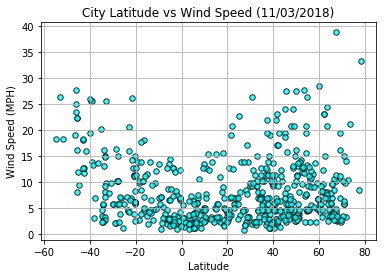

In [18]:
# Prepare variables for scatterplots, including sorting values, scaling the area by exponent 1.55, and setting company colors
x_latitude = lat
y_temp = wind_speed
c = ["aqua"]

# Plot the type scatters, which show up on one plot
plt.scatter(x=x_latitude, y=y_temp, s=30, c=c, marker='o', cmap=None, norm=None,
                          vmin=None, vmax=None, alpha=0.8, linewidths=1, verts=None,
                          edgecolors="black", data=None)

#Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (11/03/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

# Create a legend and grid
plt.grid(True)

# Save Figure
plt.savefig("City Latitude vs Wind Speed (11-03-2018).png")